# Features engineer

🔒 Global seed set to 42

🏁 Running TSS=500_only_bed

 🔁 CV (CHROM_KFOLD) | X1 → X2

🚀 Chromosome-KFold 1/5: Valid=['chr2', 'chr7', 'chr12', 'chr17', 'chr22']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[331]	train's l2: 0.0149368	val's l2: 0.0358514

🚀 Chromosome-KFold 2/5: Valid=['chr3', 'chr8', 'chr13', 'chr18']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[272]	train's l2: 0.0157842	val's l2: 0.0348449

🚀 Chromosome-KFold 3/5: Valid=['chr4', 'chr9', 'chr14', 'chr19']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[667]	train's l2: 0.0139037	val's l2: 0.0363737

🚀 Chromosome-KFold 4/5: Valid=['chr5', 'chr10', 'chr15', 'chr20']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[297]	train's l2: 0.0154014	val's l2: 0.0356656

🚀 Chromosome-KFold 5/5: Valid=['chr6', 'chr11', 'chr16', 'chr2

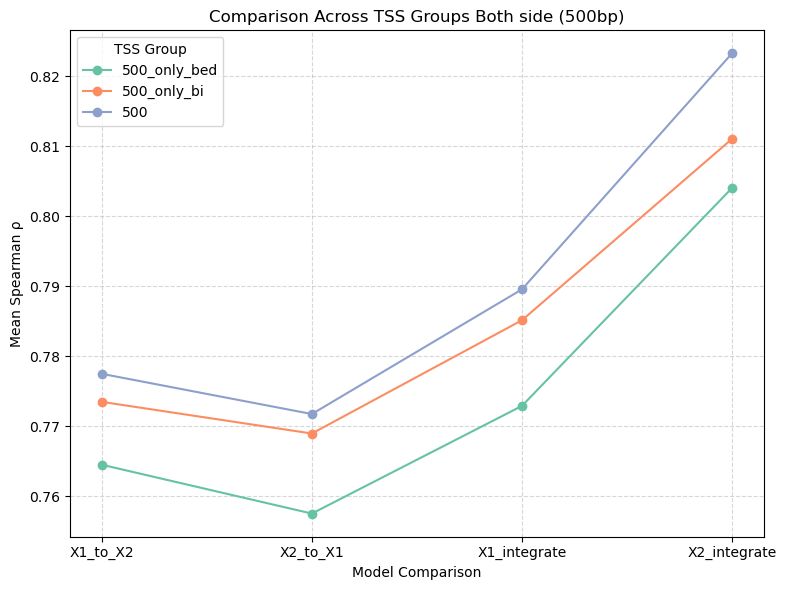

In [13]:
import os
import random
import pandas as pd
import numpy as np
import lightgbm as lgb
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from scripts.tss_compare import run_all, run_cv
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
print(f"🔒 Global seed set to {SEED}")

# ============================================================
#                  CONFIGURATION
# ============================================================
BASE_DIRS = [
    "../preprocessed_data/reference/1. merged data/with_y_500_only_bed",
    "../preprocessed_data/reference/1. merged data/with_y_500_only_bi",
    "../preprocessed_data/reference/1. merged data/with_y_500",
]
META_COLS = ["gene_name", "chr", "gene_start", "gene_end",
             "TSS_start", "TSS_end", "strand", "gex", "gex_rank"]
TARGET_COL = "gex_rank"
chromosomes = [f"chr{i}" for i in range(2, 23)]

mode="chrom_kfold"
# ============================================================
#                  LIGHTGBM PARAMETERS
# ============================================================
params = {
        "boosting_type": "gbdt",
        "learning_rate": 0.016676974956976915,
        "num_leaves": 48,
        "max_depth": 8,
        "feature_fraction": 0.64561553423692,
        "bagging_fraction": 0.8113835038425429,
        "bagging_freq": 6,
        "lambda_l1": 0.3316673054635859,
        "lambda_l2": 0.8969317795206216,
        "min_gain_to_split": 0.04923442843722911,
        "min_data_in_leaf": 38,
        "verbose": -1,
        "seed": SEED,
    }


# ============================================================
#                  MAIN LOOP OVER TSS WINDOW SIZES
# ============================================================
results_summary_new = []

for data_dir in BASE_DIRS:
    tss_label = os.path.basename(data_dir).replace("with_y_", "").replace("with_y", "default")

    print(f"\n🏁 Running TSS={tss_label}")
    mean_X1_to_X2 = run_cv("X1", "X2", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    mean_X2_to_X1 = run_cv("X2", "X1", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    X1_mean, X2_mean, X1_X2_mean = run_all(data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)

    results_summary_new.append({
        "TSS": tss_label,
        "X1_to_X2": mean_X1_to_X2,
        "X2_to_X1": mean_X2_to_X1,
        "X1_integrate": X1_mean,
        "X2_integrate": X2_mean,
    })
import matplotlib.pyplot as plt
import seaborn as sns


results_summary_new_df_2 = pd.DataFrame(results_summary_new)
# 建立顏色字典（自動產生足夠顏色）
unique_tss = results_summary_new_df_2["TSS"].unique()
palette = sns.color_palette("Set2", n_colors=len(unique_tss))
color_map = dict(zip(unique_tss, palette))

plt.figure(figsize=(8,6))

# 為每組 TSS 畫線
for tss in unique_tss:
    df_sub = results_summary_new_df_2[results_summary_new_df_2["TSS"] == tss]
    plt.plot(["X1_to_X2", "X2_to_X1", "X1_integrate", "X2_integrate"],
             df_sub.iloc[0, 1:],  # 取該行除 TSS 以外的值
             color=color_map[tss],
             marker='o',
             label=tss)

# === 標籤與外觀 ===
plt.xlabel("Model Comparison")
plt.ylabel("Mean Spearman ρ")
plt.title("Comparison Across TSS Groups Both side (500bp)")
plt.legend(title="TSS Group", loc="best")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🔒 Global seed set to 42

🏁 Running TSS=500_only_bed_one_side

 🔁 CV (CHROM_KFOLD) | X1 → X2

🚀 Chromosome-KFold 1/5: Valid=['chr2', 'chr7', 'chr12', 'chr17', 'chr22']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[406]	train's l2: 0.01462	val's l2: 0.037829

🚀 Chromosome-KFold 2/5: Valid=['chr3', 'chr8', 'chr13', 'chr18']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[407]	train's l2: 0.014859	val's l2: 0.035527

🚀 Chromosome-KFold 3/5: Valid=['chr4', 'chr9', 'chr14', 'chr19']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[439]	train's l2: 0.0146957	val's l2: 0.0367522

🚀 Chromosome-KFold 4/5: Valid=['chr5', 'chr10', 'chr15', 'chr20']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[300]	train's l2: 0.0154287	val's l2: 0.0378891

🚀 Chromosome-KFold 5/5: Valid=['chr6', 'chr11', 'chr16', '

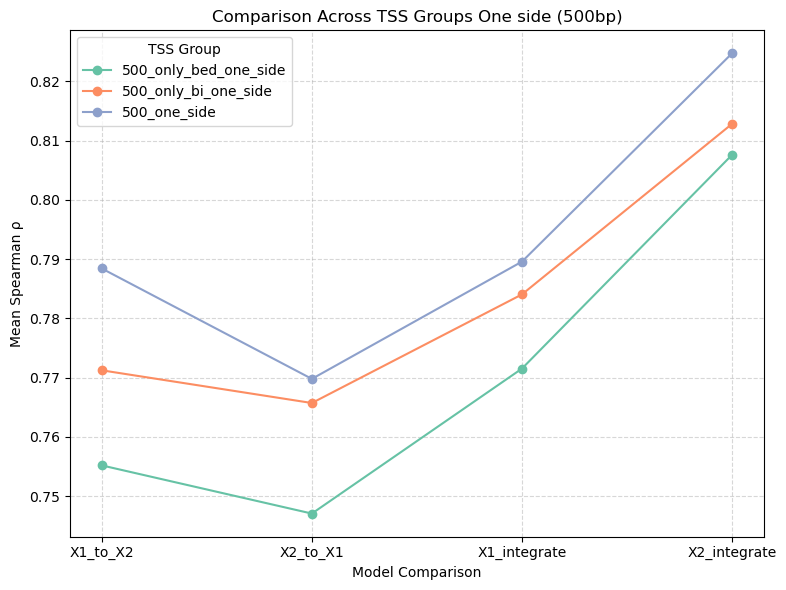

In [12]:
import os
import random
import pandas as pd
import numpy as np
import lightgbm as lgb
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from scripts.tss_compare import run_all, run_cv
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
print(f"🔒 Global seed set to {SEED}")

# ============================================================
#                  CONFIGURATION
# ============================================================
BASE_DIRS = [
    "../preprocessed_data/reference/1. merged data/with_y_500_only_bed_one_side",
    "../preprocessed_data/reference/1. merged data/with_y_500_only_bi_one_side",
    "../preprocessed_data/reference/1. merged data/with_y_500_one_side",
]
META_COLS = ["gene_name", "chr", "gene_start", "gene_end",
             "TSS_start", "TSS_end", "strand", "gex", "gex_rank"]
TARGET_COL = "gex_rank"
chromosomes = [f"chr{i}" for i in range(2, 23)]

mode="chrom_kfold"
# ============================================================
#                  LIGHTGBM PARAMETERS
# ============================================================
params = {
        "boosting_type": "gbdt",
        "learning_rate": 0.016676974956976915,
        "num_leaves": 48,
        "max_depth": 8,
        "feature_fraction": 0.64561553423692,
        "bagging_fraction": 0.8113835038425429,
        "bagging_freq": 6,
        "lambda_l1": 0.3316673054635859,
        "lambda_l2": 0.8969317795206216,
        "min_gain_to_split": 0.04923442843722911,
        "min_data_in_leaf": 38,
        "verbose": -1,
        "seed": SEED,
    }


# ============================================================
#                  MAIN LOOP OVER TSS WINDOW SIZES
# ============================================================
results_summary_new = []

for data_dir in BASE_DIRS:
    tss_label = os.path.basename(data_dir).replace("with_y_", "").replace("with_y", "default")

    print(f"\n🏁 Running TSS={tss_label}")
    mean_X1_to_X2 = run_cv("X1", "X2", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    mean_X2_to_X1 = run_cv("X2", "X1", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    X1_mean, X2_mean, X1_X2_mean = run_all(data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)

    results_summary_new.append({
        "TSS": tss_label,
        "X1_to_X2": mean_X1_to_X2,
        "X2_to_X1": mean_X2_to_X1,
        "X1_integrate": X1_mean,
        "X2_integrate": X2_mean,
    })
import matplotlib.pyplot as plt
import seaborn as sns


results_summary_new_df_2 = pd.DataFrame(results_summary_new)
# 建立顏色字典（自動產生足夠顏色）
unique_tss = results_summary_new_df_2["TSS"].unique()
palette = sns.color_palette("Set2", n_colors=len(unique_tss))
color_map = dict(zip(unique_tss, palette))

plt.figure(figsize=(8,6))

# 為每組 TSS 畫線
for tss in unique_tss:
    df_sub = results_summary_new_df_2[results_summary_new_df_2["TSS"] == tss]
    plt.plot(["X1_to_X2", "X2_to_X1", "X1_integrate", "X2_integrate"],
             df_sub.iloc[0, 1:],  # 取該行除 TSS 以外的值
             color=color_map[tss],
             marker='o',
             label=tss)

# === 標籤與外觀 ===
plt.xlabel("Model Comparison")
plt.ylabel("Mean Spearman ρ")
plt.title("Comparison Across TSS Groups One side (500bp)")
plt.legend(title="TSS Group", loc="best")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🔒 Global seed set to 42

🏁 Running TSS=500

 🔁 CV (CHROM_KFOLD) | X1 → X2

🚀 Chromosome-KFold 1/5: Valid=['chr2', 'chr7', 'chr12', 'chr17', 'chr22']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[438]	train's l2: 0.011418	val's l2: 0.0285678

🚀 Chromosome-KFold 2/5: Valid=['chr3', 'chr8', 'chr13', 'chr18']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[515]	train's l2: 0.0115708	val's l2: 0.0265711

🚀 Chromosome-KFold 3/5: Valid=['chr4', 'chr9', 'chr14', 'chr19']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[442]	train's l2: 0.0116728	val's l2: 0.0280422

🚀 Chromosome-KFold 4/5: Valid=['chr5', 'chr10', 'chr15', 'chr20']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[518]	train's l2: 0.0114865	val's l2: 0.0290551

🚀 Chromosome-KFold 5/5: Valid=['chr6', 'chr11', 'chr16', 'chr21']
Traini

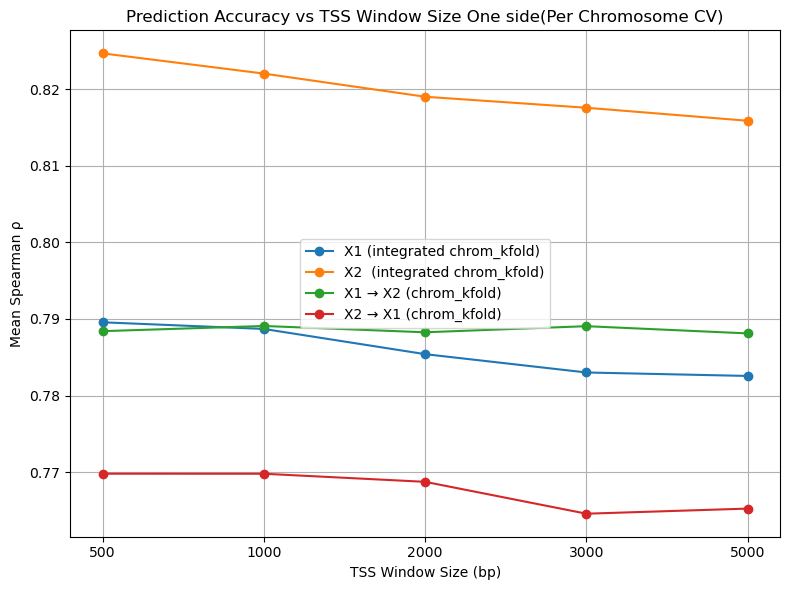

In [6]:
from scripts.tss_compare import run_all, run_cv
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
print(f"🔒 Global seed set to {SEED}")

# ============================================================
#                  CONFIGURATION
# ============================================================
BASE_DIRS = [
    # "../preprocessed_data/reference/1. merged data/with_y",
    # "../preprocessed_data/reference/1. merged data/with_y_500",
    # "../preprocessed_data/reference/1. merged data/with_y_1000",
    # "../preprocessed_data/reference/1. merged data/with_y_2000",
    # "../preprocessed_data/reference/1. merged data/with_y_3000",
    "../preprocessed_data/reference/1. merged data/with_y_500_one_side",
    "../preprocessed_data/reference/1. merged data/with_y_1000_one_side",
    "../preprocessed_data/reference/1. merged data/with_y_2000_one_side",
    "../preprocessed_data/reference/1. merged data/with_y_3000_one_side",
    "../preprocessed_data/reference/1. merged data/with_y_5000_one_side",

]
META_COLS = ["gene_name", "chr", "gene_start", "gene_end",
             "TSS_start", "TSS_end", "strand", "gex", "gex_rank"]
TARGET_COL = "gex_rank"
chromosomes = [f"chr{i}" for i in range(2, 23)]
mode="chrom_kfold"

# ============================================================
#                  LIGHTGBM PARAMETERS
# ============================================================
params = {
        "boosting_type": "gbdt",
        "learning_rate": 0.016676974956976915,
        "num_leaves": 48,
        "max_depth": 8,
        "feature_fraction": 0.64561553423692,
        "bagging_fraction": 0.8113835038425429,
        "bagging_freq": 6,
        "lambda_l1": 0.3316673054635859,
        "lambda_l2": 0.8969317795206216,
        "min_gain_to_split": 0.04923442843722911,
        "min_data_in_leaf": 38,
        "verbose": -1,
        "seed": SEED,
    }


# ============================================================
#                  MAIN LOOP OVER TSS WINDOW SIZES
# ============================================================
results_summary_new = []

for data_dir in BASE_DIRS:
    tss_label = os.path.basename(data_dir).replace("with_y_", "").replace("with_y", "default").replace("_one_side", "")

    print(f"\n🏁 Running TSS={tss_label}")
    mean_X1_to_X2 = run_cv("X1", "X2", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    mean_X2_to_X1 = run_cv("X2", "X1", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    X1_mean, X2_mean, X1_X2_mean = run_all(data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)

    results_summary_new.append({
        "TSS": tss_label,
        "X1_to_X2": mean_X1_to_X2,
        "X2_to_X1": mean_X2_to_X1,
        "X1_integrate": X1_mean,
        "X2_integrate": X2_mean,
    })
results_summary_new_df = pd.DataFrame(results_summary_new)
results_summary_new_df = results_summary_new_df.sort_values("TSS", key=lambda s: s.map(int))
    
plt.figure(figsize=(8,6))
plt.plot(results_summary_new_df["TSS"], results_summary_new_df["X1_integrate"], marker='o', label=f"X1 (integrated {mode})")
plt.plot(results_summary_new_df["TSS"], results_summary_new_df["X2_integrate"], marker='o', label=f"X2  (integrated {mode})")
plt.plot(results_summary_new_df["TSS"], results_summary_new_df["X1_to_X2"], marker='o', label=f"X1 → X2 ({mode})")
plt.plot(results_summary_new_df["TSS"], results_summary_new_df["X2_to_X1"], marker='o', label=f"X2 → X1 ({mode})")
plt.xlabel("TSS Window Size (bp)")
plt.ylabel("Mean Spearman ρ")
plt.title("Prediction Accuracy vs TSS Window Size One side(Per Chromosome CV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
results_summary_new_df

,TSS,X1_to_X2,X2_to_X1,X1_integrate,X2_integrate
0,500,0.788408,0.769782,0.789567,0.824709
1,1000,0.789084,0.769776,0.788698,0.822066
2,2000,0.788261,0.768720,0.785403,0.819039
3,3000,0.789059,0.764555,0.783008,0.817602
4,5000,0.788114,0.765224,0.782556,0.815900


🔒 Global seed set to 42

🏁 Running TSS=0

 🔁 CV (CHROM_KFOLD) | X1 → X2

🚀 Chromosome-KFold 1/5: Valid=['chr2', 'chr7', 'chr12', 'chr17', 'chr22']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[445]	train's l2: 0.011135	val's l2: 0.0287423

🚀 Chromosome-KFold 2/5: Valid=['chr3', 'chr8', 'chr13', 'chr18']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[552]	train's l2: 0.0111284	val's l2: 0.0271787

🚀 Chromosome-KFold 3/5: Valid=['chr4', 'chr9', 'chr14', 'chr19']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[751]	train's l2: 0.01089	val's l2: 0.0280701

🚀 Chromosome-KFold 4/5: Valid=['chr5', 'chr10', 'chr15', 'chr20']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[812]	train's l2: 0.0107689	val's l2: 0.0290335

🚀 Chromosome-KFold 5/5: Valid=['chr6', 'chr11', 'chr16', 'chr21']
Training u

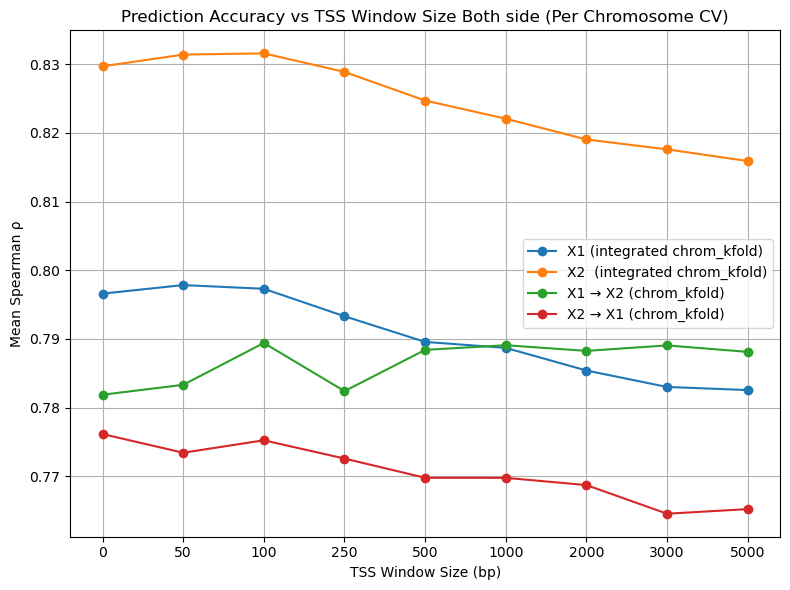

In [ ]:
from scripts.tss_compare import run_all, run_cv
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
print(f"🔒 Global seed set to {SEED}")

# ============================================================
#                  CONFIGURATION
# ============================================================
BASE_DIRS = [
    "../preprocessed_data/reference/1. merged data/with_y_0_one_side",
    
]
META_COLS = ["gene_name", "chr", "gene_start", "gene_end",
             "TSS_start", "TSS_end", "strand", "gex", "gex_rank"]
TARGET_COL = "gex_rank"
chromosomes = [f"chr{i}" for i in range(2, 23)]
mode="chrom_kfold"

# ============================================================
#                  LIGHTGBM PARAMETERS
# ============================================================
params = {
        "boosting_type": "gbdt",
        "learning_rate": 0.016676974956976915,
        "num_leaves": 48,
        "max_depth": 8,
        "feature_fraction": 0.64561553423692,
        "bagging_fraction": 0.8113835038425429,
        "bagging_freq": 6,
        "lambda_l1": 0.3316673054635859,
        "lambda_l2": 0.8969317795206216,
        "min_gain_to_split": 0.04923442843722911,
        "min_data_in_leaf": 38,
        "verbose": -1,
        "seed": SEED,
    }


# ============================================================
#                  MAIN LOOP OVER TSS WINDOW SIZES
# ============================================================
results_summary_new = []

for data_dir in BASE_DIRS:
    tss_label = os.path.basename(data_dir).replace("with_y_", "").replace("with_y", "5000").replace("_one_side", "")

    print(f"\n🏁 Running TSS={tss_label}")
    mean_X1_to_X2 = run_cv("X1", "X2", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    mean_X2_to_X1 = run_cv("X2", "X1", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    X1_mean, X2_mean, X1_X2_mean = run_all(data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)

    results_summary_new.append({
        "TSS": tss_label,
        "X1_to_X2": mean_X1_to_X2,
        "X2_to_X1": mean_X2_to_X1,
        "X1_integrate": X1_mean,
        "X2_integrate": X2_mean,
    })
results_summary_new_df_4 = pd.DataFrame(results_summary_new)
results_summary_new_df_3 = pd.concat([results_summary_new_df_4, results_summary_new_df_3], ignore_index=True)
results_summary_new_df_3 = results_summary_new_df_3.sort_values("TSS", key=lambda s: s.map(int))

plt.figure(figsize=(8,6))
plt.plot(results_summary_new_df_3["TSS"], results_summary_new_df_3["X1_integrate"], marker='o', label=f"X1 (integrated {mode})")
plt.plot(results_summary_new_df_3["TSS"], results_summary_new_df_3["X2_integrate"], marker='o', label=f"X2  (integrated {mode})")
plt.plot(results_summary_new_df_3["TSS"], results_summary_new_df_3["X1_to_X2"], marker='o', label=f"X1 → X2 ({mode})")
plt.plot(results_summary_new_df_3["TSS"], results_summary_new_df_3["X2_to_X1"], marker='o', label=f"X2 → X1 ({mode})")

plt.xlabel("TSS Window Size (bp)")
plt.ylabel("Mean Spearman ρ")
plt.title("Prediction Accuracy vs TSS Window Size One side (Per Chromosome CV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
results_summary_new_df_3 = pd.concat([results_summary_new_df, results_summary_new_df_3], ignore_index=True)
results_summary_new_df_3 = results_summary_new_df_3.sort_values("TSS", key=lambda s: s.map(int))


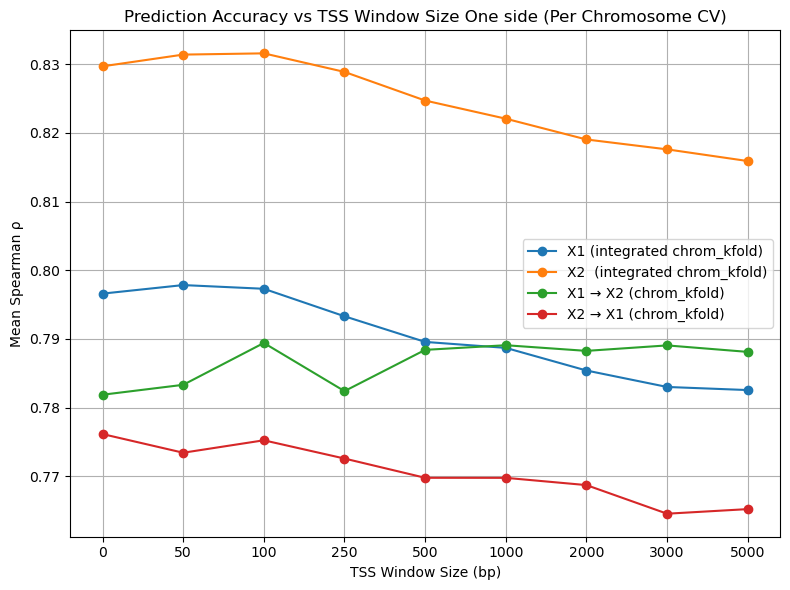

In [42]:
plt.figure(figsize=(8,6))
plt.plot(results_summary_new_df_3["TSS"], results_summary_new_df_3["X1_integrate"], marker='o', label=f"X1 (integrated {mode})")
plt.plot(results_summary_new_df_3["TSS"], results_summary_new_df_3["X2_integrate"], marker='o', label=f"X2  (integrated {mode})")
plt.plot(results_summary_new_df_3["TSS"], results_summary_new_df_3["X1_to_X2"], marker='o', label=f"X1 → X2 ({mode})")
plt.plot(results_summary_new_df_3["TSS"], results_summary_new_df_3["X2_to_X1"], marker='o', label=f"X2 → X1 ({mode})")

plt.xlabel("TSS Window Size (bp)")
plt.ylabel("Mean Spearman ρ")
plt.title("Prediction Accuracy vs TSS Window Size One side (Per Chromosome CV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🔒 Global seed set to 42

🏁 Running TSS=5000

 🔁 CV (CHROM_KFOLD) | X1 → X2

🚀 Chromosome-KFold 1/5: Valid=['chr2', 'chr7', 'chr12', 'chr17', 'chr22']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[300]	train's l2: 0.0129784	val's l2: 0.0288073

🚀 Chromosome-KFold 2/5: Valid=['chr3', 'chr8', 'chr13', 'chr18']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[480]	train's l2: 0.0123619	val's l2: 0.02658

🚀 Chromosome-KFold 3/5: Valid=['chr4', 'chr9', 'chr14', 'chr19']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[296]	train's l2: 0.0133856	val's l2: 0.0285728

🚀 Chromosome-KFold 4/5: Valid=['chr5', 'chr10', 'chr15', 'chr20']
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[776]	train's l2: 0.011443	val's l2: 0.0270214

🚀 Chromosome-KFold 5/5: Valid=['chr6', 'chr11', 'chr16', 'chr21']
Trainin

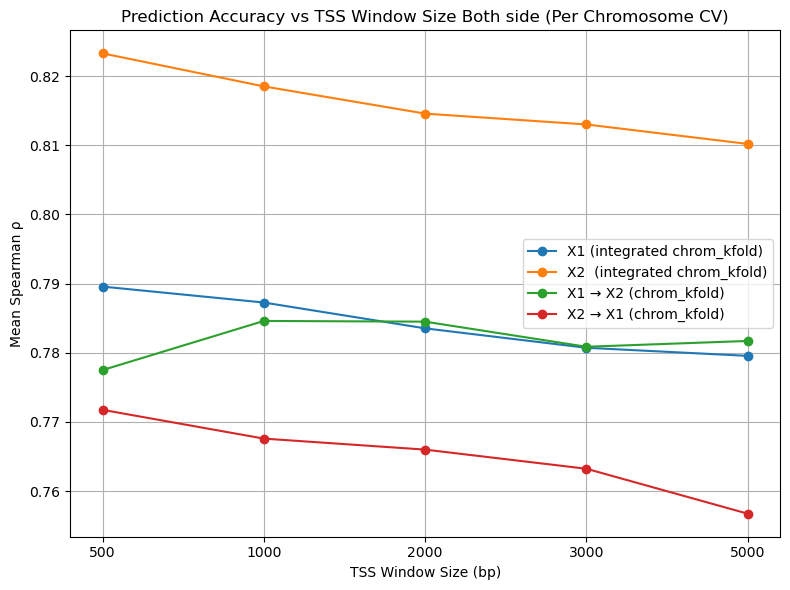

In [7]:
from scripts.tss_compare import run_all, run_cv
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
print(f"🔒 Global seed set to {SEED}")

# ============================================================
#                  CONFIGURATION
# ============================================================
BASE_DIRS = [
    "../preprocessed_data/reference/1. merged data/with_y",
    "../preprocessed_data/reference/1. merged data/with_y_500",
    "../preprocessed_data/reference/1. merged data/with_y_1000",
    "../preprocessed_data/reference/1. merged data/with_y_2000",
    "../preprocessed_data/reference/1. merged data/with_y_3000",
    # "../preprocessed_data/reference/1. merged data/with_y_500_one_side",
    # "../preprocessed_data/reference/1. merged data/with_y_5000_one_side",
    # "../preprocessed_data/reference/1. merged data/with_y_1000_one_side",
    # "../preprocessed_data/reference/1. merged data/with_y_2000_one_side",
    # "../preprocessed_data/reference/1. merged data/with_y_3000_one_side",
    
]
META_COLS = ["gene_name", "chr", "gene_start", "gene_end",
             "TSS_start", "TSS_end", "strand", "gex", "gex_rank"]
TARGET_COL = "gex_rank"
chromosomes = [f"chr{i}" for i in range(2, 23)]
mode="chrom_kfold"

# ============================================================
#                  LIGHTGBM PARAMETERS
# ============================================================
params = {
        "boosting_type": "gbdt",
        "learning_rate": 0.016676974956976915,
        "num_leaves": 48,
        "max_depth": 8,
        "feature_fraction": 0.64561553423692,
        "bagging_fraction": 0.8113835038425429,
        "bagging_freq": 6,
        "lambda_l1": 0.3316673054635859,
        "lambda_l2": 0.8969317795206216,
        "min_gain_to_split": 0.04923442843722911,
        "min_data_in_leaf": 38,
        "verbose": -1,
        "seed": SEED,
    }


# ============================================================
#                  MAIN LOOP OVER TSS WINDOW SIZES
# ============================================================
results_summary_new = []

for data_dir in BASE_DIRS:
    tss_label = os.path.basename(data_dir).replace("with_y_", "").replace("with_y", "5000")

    print(f"\n🏁 Running TSS={tss_label}")
    mean_X1_to_X2 = run_cv("X1", "X2", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    mean_X2_to_X1 = run_cv("X2", "X1", data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)
    X1_mean, X2_mean, X1_X2_mean = run_all(data_dir, META_COLS, TARGET_COL, chromosomes, params , mode=mode, n_splits=5)

    results_summary_new.append({
        "TSS": tss_label,
        "X1_to_X2": mean_X1_to_X2,
        "X2_to_X1": mean_X2_to_X1,
        "X1_integrate": X1_mean,
        "X2_integrate": X2_mean,
    })
results_summary_new_df_2 = pd.DataFrame(results_summary_new)
results_summary_new_df_2 = results_summary_new_df_2.sort_values("TSS", key=lambda s: s.map(int))

plt.figure(figsize=(8,6))
plt.plot(results_summary_new_df_2["TSS"], results_summary_new_df_2["X1_integrate"], marker='o', label=f"X1 (integrated {mode})")
plt.plot(results_summary_new_df_2["TSS"], results_summary_new_df_2["X2_integrate"], marker='o', label=f"X2  (integrated {mode})")
plt.plot(results_summary_new_df_2["TSS"], results_summary_new_df_2["X1_to_X2"], marker='o', label=f"X1 → X2 ({mode})")
plt.plot(results_summary_new_df_2["TSS"], results_summary_new_df_2["X2_to_X1"], marker='o', label=f"X2 → X1 ({mode})")
plt.xlabel("TSS Window Size (bp)")
plt.ylabel("Mean Spearman ρ")
plt.title("Prediction Accuracy vs TSS Window Size Both side (Per Chromosome CV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

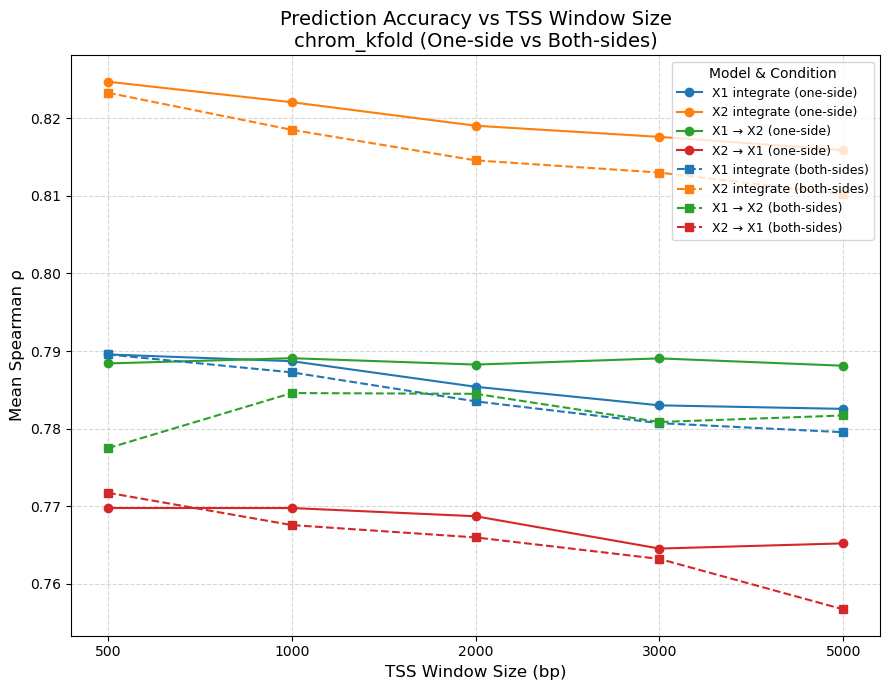

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))

# === 顏色對應 ===
colors = {
    "X1_integrate": "tab:blue",
    "X2_integrate": "tab:orange",
    "X1_to_X2": "tab:green",
    "X2_to_X1": "tab:red"
}

# === One-side (實線) ===
for col, color in colors.items():
    plt.plot(results_summary_new_df["TSS"], results_summary_new_df[col],
             color=color, linestyle='-', marker='o', label=f"{col.replace('_',' ').replace('to','→')} (one-side)")

# === Both-sides (虛線) ===
for col, color in colors.items():
    plt.plot(results_summary_new_df_2["TSS"], results_summary_new_df_2[col],
             color=color, linestyle='--', marker='s', label=f"{col.replace('_',' ').replace('to','→')} (both-sides)")

# === 標籤與樣式 ===
plt.xlabel("TSS Window Size (bp)", fontsize=12)
plt.ylabel("Mean Spearman ρ", fontsize=12)
plt.title("Prediction Accuracy vs TSS Window Size\nchrom_kfold (One-side vs Both-sides)", fontsize=14)
plt.legend(title="Model & Condition", loc='best', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
